In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

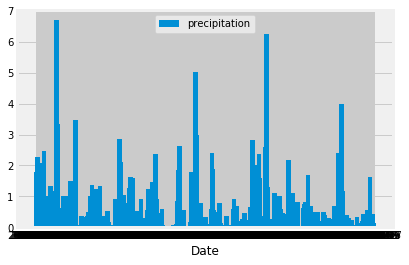

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
date = dt.date(2017, 8, 23) - dt.timedelta(days=365) 

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date).all()
precip
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip)
df.set_index('date')
# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(df['date'],df['prcp'], width = 5, label='precipitation')
plt.legend(loc = 9) 
plt.xlabel('Date')
plt.savefig("Images/Precipitation")

In [122]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stat = df.describe()
stat

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [123]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).count()
stations

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [124]:
active = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [125]:
most = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                     filter(Measurement.station=="USC00519281").all()
most

[(54.0, 85.0, 71.66378066378067)]

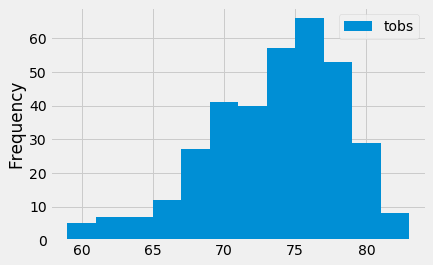

In [127]:
date = dt.date(2017, 8, 23) - dt.timedelta(days=365) 
temp = session.query(Measurement.tobs).filter(Measurement.date >= date,Measurement.station=="USC00519281").all()
temp_df = pd.DataFrame(temp)
plt.hist(temp_df['tobs'], bins=12, label='tobs')
plt.legend()
plt.ylabel("Frequency")
plt.savefig('Images/Rain Frequency in most observed')

In [85]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [90]:
print(calc_temps('2016-8-23', '2017-8-23'))

[(58.0, 74.14387974230493, 87.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


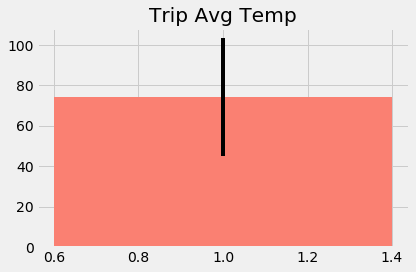

In [138]:
x = 1
y = 74.14387974230493
yerr = (87-58)
plt.bar(x, height= y, yerr=yerr, color='salmon')
plt.title("Trip Avg Temp")
plt.tight_layout()
plt.savefig("Images/Trip Avg Temp")

In [146]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
date = dt.date(2017, 8, 23) - dt.timedelta(days=365) 
rain = session.query(Measurement.station, Measurement.date, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
filter(Measurement.date >= date).order_by((Measurement.prcp).desc()).all()
rain = pd.DataFrame(rain)
rain

,station,date,name,latitude,longitude,elevation,prcp
0,USC00516128,2016-09-14,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,6.7
1,USC00516128,2016-09-14,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,6.7
2,USC00516128,2016-09-14,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,6.7
3,USC00516128,2016-09-14,"PEARL CITY, HI US",21.39340,-157.97510,11.9,6.7
4,USC00516128,2016-09-14,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,6.7
...,...,...,...,...,...,...,...
20065,USC00516128,2017-08-20,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,NaN
20066,USC00516128,2017-08-20,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,NaN
20067,USC00516128,2017-08-20,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,NaN
20068,USC00516128,2017-08-20,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,NaN


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
